In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import scipy as sp
from scipy.fftpack import fft, ifft


In [10]:
imu_df = pd.read_csv('C:\PlatformIOProjects\TTGO-T-Wristband\data\IMUdata_09102022_114745.csv')
print(imu_df.head(n=10))

            time  marker   data_1   data_2    data_3
0   1.665276e+09       1  -020704   005737   -009267
1   1.665276e+09       1  -020699   005746   -009333
2   1.665276e+09       1  -020699   005746   -009333
3   1.665276e+09       1  -020699   005746   -009333
4   1.665276e+09       1  -020699   005746   -009333
5   1.665276e+09       1  -020699   005746   -009333
6   1.665276e+09       1  -020734   005747   -009273
7   1.665276e+09       1  -020734   005747   -009273
8   1.665276e+09       1  -020734   005747   -009273
9   1.665276e+09       1  -020704   005737   -009267
10  1.665276e+09       1  -020704   005737   -009267
11  1.665276e+09       1  -020734   005747   -009273
12  1.665276e+09       1  -020734   005747   -009273
13  1.665276e+09       1  -020745   005646   -009127
14  1.665276e+09       1  -020745   005646   -009127
15  1.665276e+09       1  -020745   005646   -009127
16  1.665276e+09       1  -020745   005646   -009127
17  1.665276e+09       1  -020745   005646   -

In [140]:
imu_df['time']= pd.to_datetime(imu_df['time'])
print(imu_df.head(n=30))

TypeError: 'Series' object cannot be interpreted as an integer

In [35]:
print(f"No of keyboard tags: {len(imu_df[imu_df['marker']==2])}")
print(f"No of logs: {len(imu_df[imu_df['marker']==0])}")
print(f"No of data entries: {len(imu_df[imu_df['marker']==1])}")


No of keyboard tags: 17
No of logs: 0
No of data entries: 1423779


In [12]:
print(imu_df[imu_df['marker']==2])

                 time  marker data_1 data_2 data_3
100088   1.665277e+09       2      t    NaN    NaN
267559   1.665277e+09       2      h    NaN    NaN
370245   1.665277e+09       2      d    NaN    NaN
438456   1.665277e+09       2      w    NaN    NaN
457035   1.665277e+09       2      e    NaN    NaN
711040   1.665277e+09       2      t    NaN    NaN
726365   1.665277e+09       2      s    NaN    NaN
732571   1.665277e+09       2      w    NaN    NaN
767199   1.665277e+09       2      d    NaN    NaN
847578   1.665278e+09       2      w    NaN    NaN
968681   1.665278e+09       2      w    NaN    NaN
986143   1.665278e+09       2      t    NaN    NaN
994068   1.665278e+09       2      i    NaN    NaN
1256605  1.665278e+09       2      d    NaN    NaN
1318910  1.665278e+09       2      t    NaN    NaN
1356915  1.665278e+09       2      s    NaN    NaN
1423795  1.665278e+09       2      s    NaN    NaN


In [118]:
marker_df = imu_df[imu_df['marker']==2].reset_index()
marker_df=marker_df.rename(columns={'index':'imu_df_key', 'data_1':'label'})
marker_df= marker_df.drop(['data_2', 'data_3'], axis=1)
print(marker_df.head())
print(f"Set of unique labels: {np.unique(marker_df['label'])}")
for l in np.unique(marker_df['label']):
    print(f"{l}: {len(marker_df[marker_df['label']==l])}")

   imu_df_key          time  marker label
0      100088  1.665277e+09       2     t
1      267559  1.665277e+09       2     h
2      370245  1.665277e+09       2     d
3      438456  1.665277e+09       2     w
4      457035  1.665277e+09       2     e
Set of unique labels: ['d' 'e' 'h' 'i' 's' 't' 'w']
d: 3
e: 1
h: 1
i: 1
s: 3
t: 4
w: 4


In [78]:
marker_df['index'] = marker_df['imu_df_key']-1
marker_df=marker_df.set_index('index')
print(marker_df)
label_imu=pd.merge(imu_df[imu_df['marker']==1],marker_df['label'],how='left', left_index=True, right_on='index')
print(label_imu[label_imu['label']=='t'])
print(label_imu.dtypes)

         imu_df_key          time  marker label
index                                          
100087       100088  1.665277e+09       2     t
267558       267559  1.665277e+09       2     h
370244       370245  1.665277e+09       2     d
438455       438456  1.665277e+09       2     w
457034       457035  1.665277e+09       2     e
711039       711040  1.665277e+09       2     t
726364       726365  1.665277e+09       2     s
732570       732571  1.665277e+09       2     w
767198       767199  1.665277e+09       2     d
847577       847578  1.665278e+09       2     w
968680       968681  1.665278e+09       2     w
986142       986143  1.665278e+09       2     t
994067       994068  1.665278e+09       2     i
1256604     1256605  1.665278e+09       2     d
1318909     1318910  1.665278e+09       2     t
1356914     1356915  1.665278e+09       2     s
1423794     1423795  1.665278e+09       2     s
             index          time  marker   data_1    data_2    data_3 label
100087.0    

In [116]:
label_imu['label']=label_imu['label'].replace('NaN', np.nan).ffill()
label_imu['label']=label_imu['label'].bfill()
label_imu['data_1']=pd.to_numeric(label_imu['data_1'], errors='coerce').astype(float)
label_imu['data_2']=pd.to_numeric(label_imu['data_2'], errors='coerce').astype(float)
label_imu['data_3']=pd.to_numeric(label_imu['data_3'], errors='coerce').astype(float)
print(f"Talking entries: {len(label_imu[label_imu['label']=='t'])}")
print(f"Walking entries: {len(label_imu[label_imu['label']=='w'])}")
print(f"Drawing entries: {len(label_imu[label_imu['label']=='d'])}")
# label_imu['label']=label_imu['label'].apply(lambda x: pd.to_numeric(x, errors='coerce')).ffill()
# label_imu=label_imu.ffill()
# print(label_imu.iloc[100087:100097])


Talking entries: 328809
Walking entries: 191768
Drawing entries: 210892


C:\Users\Salomé\AppData\Local\Temp\ipykernel_18140\4103708927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draw_df['time']=pd.to_datetime(draw_df['time'], unit='ms')


-32768.0


C:\Users\Salomé\AppData\Local\Temp\ipykernel_18140\4103708927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draw_df['diff'] = draw_df['index'].diff()


           index                          time  marker   data_1  data_2  \
370244.0  370244 1970-01-20 06:34:36.959553512       1 -24412.0 -5798.0   
NaN       370246 1970-01-20 06:34:36.959554594       1 -24412.0 -5798.0   
NaN       370247 1970-01-20 06:34:36.959558050       1 -24412.0 -5798.0   
NaN       370248 1970-01-20 06:34:36.959558050       1 -24472.0 -5683.0   
NaN       370249 1970-01-20 06:34:36.959560733       1 -24472.0 -5683.0   

           data_3 label  diff  
370244.0 -10705.0     d   NaN  
NaN      -10705.0     d   2.0  
NaN      -10705.0     d   1.0  
NaN      -10774.0     d   1.0  
NaN      -10774.0     d   1.0  


<AxesSubplot:xlabel='time'>

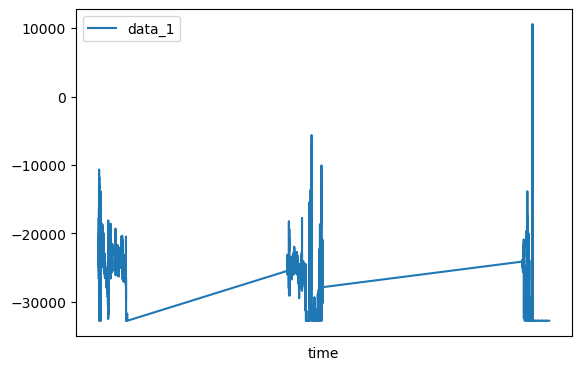

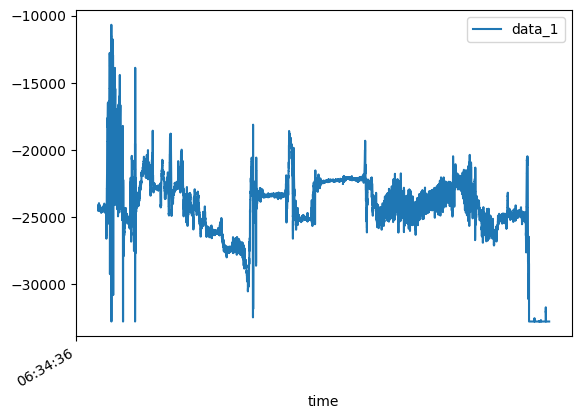

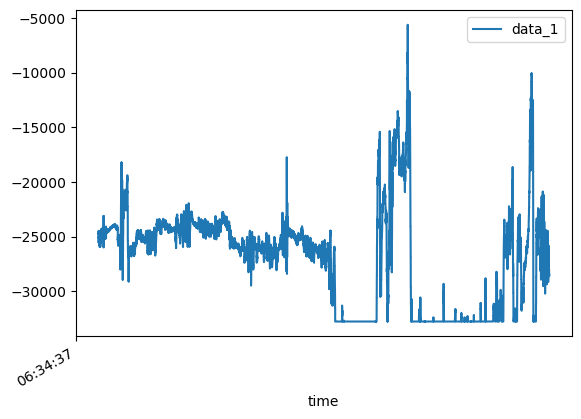

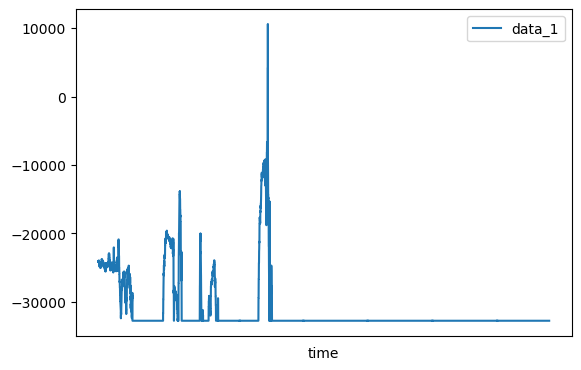

In [142]:
draw_df =label_imu[label_imu['label']=='d']
draw_df['time']=pd.to_datetime(draw_df['time'], unit='ms')
print(np.min(draw_df['data_1']))
draw_df.plot('time', 'data_1')
draw_df['diff'] = draw_df['index'].diff()
print(draw_df.head())
idx_change = draw_df['index'][draw_df['diff']>10]
# print(idx_change)

draw_df_sample1 = draw_df[:idx_change.iloc[0]]
draw_df_sample1 = draw_df_sample1.iloc[:-10]
draw_df_sample1.plot('time', 'data_1')

draw_df_sample2 = draw_df[idx_change.iloc[0]:idx_change.iloc[1]]
draw_df_sample2 = draw_df_sample2.iloc[:-10]
draw_df_sample2.plot('time', 'data_1')

draw_df_sample3 = draw_df[idx_change.iloc[1]:]
draw_df_sample3 = draw_df_sample3.iloc[:-10]
draw_df_sample3.plot('time', 'data_1')

In [113]:
ddf_list = [draw_df_sample1, draw_df_sample2, draw_df_sample3]
N = len(ddf_list[0])
n= np.arange(N)
print('sample rate: ')
s= fft(ddf_list[1]['data_1'])


## 1000: vbat: 3.718
-32768.0


C:\Users\Salomé\AppData\Local\Temp\ipykernel_18140\341242479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draw_df['data_1'] = pd.to_numeric(draw_df['data_1'], errors='coerce')
